#### [**NICOLAS CACHANOSKY**](http://www.ncachanosky.com) | Department of Economics | Metropolitan State University of Denver | ncachano@msudenver.edu

# AD-AS MODEL
---

This note illustrates how to code a simple AD-S Model in Python. The purpose of the note is to walk through Python applications, not to offer a detailed discussion of the AD-AS Model or to show best coding practices. The note also assumes familiarity with the AD-AS model and a beginner experience with Python.

For a more complete and detailed discussion of Python applications see the material in [Quant Econ](https://quantecon.org/).

---

## TABLE OF CONTENTS
1. [The AD-AS model](#1.-THE-AD-AS-MODEL)
2. [Aggregate Demand (AD)](#2.-AGGREGATE-DEMAND-(AD))
3. [Long-Run Aggregate Supply (LRAS)](#3.-LONG-RUN-AGGREGATE-SUPPLY-(LRAS))
4. [Short-Run Aggregate Supply (SRAS)](#4.-SHORT-RUN-AGGREGATE-SUPPLY-(SRAS))
5. [Putting all the pieces together](#5.-PUTTING-ALL-THE-PIECES-TOGETHER)
6. [Shocks](#6.-SHOCKS)

# 1. THE AD-AS MODEL

The AD-AS model shows the relationship between output $(Y)$ and the price level $(P)$. Different to the IS-LM model, in this case $P$ is endogenous and varies with different levels of $Y$. The AD-AS model has three components:

1. AD: Aggregate demand
2. LRAS: Long-run aggregate supply
3. SRAR: Short-run aggregate supply

The AD-AS model is more *general* than the IS-LM model in the sense that it allows for the price level to change. Therea are two differences between these models. The first one is taht while the AD-AS model allows for the interest rate $(i)$ to change, it does not show up explicitly in the model as it does in the IS-LM framework. The second one, is that both, monetary and fiscal policy affect the same line (the $AD$), while in the IS-LM framework monetary and fiscal policy shift *different* lines.

# 2. AGGREGATE DEMAND (AD)

The $AD$ line tracks all the output and price level combinations for whith the IS-LM model is in equilibrium. Graphically, it shows how equilibrum moves in the IS-LM graph when $P$ changes. A change in $P$ shifts the LM schedule giving a new equilibrium point on the IS schedule. In simple terms: $AD = Y = C + I + G + (X - Z)$ where $C$ is the household consumption, $I$ is investment, $G$ is govegnment spending, $X$ is exports, and $Z$ is imports.

In the [IS-LM model note](https://nbviewer.jupyter.org/github/ncachanosky/Macroeconomics-with-Python/blob/master/IS-LM%20Model.ipynb)  there is consumption function, an investment function, and an imports function. The remainig variables $(G = \bar{G} \text{ and } X = \bar{X})$ are treated as exogenous. The consumption, investment, imports, and money demadn functions are:

\begin{align}
    C   &= a + b(Y-T)            \\[10pt]
    I   &= \bar{I} - d \cdot i   \\[10pt]
    Z   & = \alpha + \beta(Y-T)  \\[10pt]
    M^d &= c_1 + c_2 Y - c_3 i
\end{align}

Where $a>0$ and $b \in (0, 1)$ are the household level of autonomous consumption and the marginal propensity to consume respectively with $T$ representing the nominal value of taxes; \bar{I} is the level of investment when $i = 0$ and $d >0$ is the slope of investment with respect to $i$; $\alpha >0$ and $\beta \in (0, 1)$ are the autonomous level and the marginal propensity to import respectively; and $c_1>0, c_2>0, c_3>0$ capture the keynesian precautionary, transation, and especualtion reasons to demand money.

The $AD$ is the equilibrium level of output $(Y^*)$ from the IS-LM model, which is a function of $(P)$. From the [IS-LM model note](https://nbviewer.jupyter.org/github/ncachanosky/Macroeconomics-with-Python/blob/master/IS-LM%20Model.ipynb) (section 4):

\begin{align}
   Y^* &= \frac{\left[(a-\alpha)-(b-\beta)T+\bar{I}+\bar{G}+X\right]/d + (1/c_3) \left(M^S_0/P - c_1 \right)}{(1-b+\beta)/d - (c_2/c_3)} \\[10pt]
   Y^* &= \underbrace{\left[\frac{(a-\alpha)-(b-\beta)T+\bar{I}+\bar{G} + X}{d} - \frac{c_1}{c_3} \right] \left[\frac{1-b+\beta}{d} - \frac{c_2}{c_3} \right]^{-1}}_\text{vertical level} + \underbrace{\frac{M^S_0}{c_3} \left[\frac{1-b+\beta}{d} - \frac{c_2}{c_3} \right]^{-1}}_\text{shape} \cdot \frac{1}{P}
\end{align}

Even though the function looks complicated, note that the relationship between $Y$ and $P$ is hiperbolic. Note that an increaes in $M^S_0$ increases the level of Y but also changes the *shape* of $AD$.

## 2.1 MONEY SUPPLY AND VELOCITY

The AD-AS model has a real variable $(Y)$ and a nominal variable $(P)$. Because $PY = NGDP$ the model can be framed in terms of the equation of exchange.

\begin{equation}
    MV_{Y} = P_{Y}Y
\end{equation}

Where $M$ is money supply (shown as $M^S_0$ above), $V_Y$ is the velocity of money circulation, and $P_{Y}$ is the GDP deflator of real output $Y$. Note this simple form, $Y = \frac{MV_Y}{P_Y}$ also has the hiperbolic shape discussed above.

To add a layer of complexity, money supply can be open in base money $(B)$ times the money-multiplier $m$:

\begin{align}
   m &= \frac{1 + \lambda}{\rho + \lambda} \\[10pt]
   M &= B \cdot m                          \\[10pt]
   \left(Bm\right) V_Y &= P_Y Y
\end{align}

where $\lambda \in (0, 1)$ is the currency-drain ratio (cash-to-deposit ratio) and $\rho \in (0, 1)$ is the reserve ratio (desired plus required level of reserves).

If money demand $M^D$ is a $k$ proportion of nominal income $(P_YY)$, then, assuming equilibrium in the money market, money velocity is the inverse of money demand: $V_Y = 1/k$. As less (more) money is demanded to be hold as a cash-balance, the more (less) quickly money moves (in average) in the economy.

\begin{align}
    M^S_0V_Y &= P_YY                       \\[10pt]
    M^D      &= k \cdot \left(P_YY \right) \\[10pt]
    M^S_0    &= M^D                        \\[10pt]
    V_Y      &= \frac{1}{k}
\end{align}

---

We can code $AD$ with a `class`. A `class` allows to build our own type of objects. In this case the code constructs a class called `AD` that has (1) the money multiplier, (2) the money supply, and (3) estimates $AD$ for a given $P$.

The code follows the following structure. The first section imports the required packages. The second section builds the $AD$ `class`. The third section show the values of the money multiplier and total money supply. The fourth section plots the $AD$.

The `class` is build the following way. The first element, `__init__` collects the model (or `class`) parameters. Note that the values of these parameters are defined **inside** the `class` (this does not need to be the case) and that these parameters exist **inside** the class (they are not global values). After the parameters are defined, the `class` continues to build the three components. Note that the first two (money multiplier and money supply) can be defined with the paramters already included in the `class`. The third component, the value of $AD$, requires an exogenous value, $P$.

Money multiplier = 7.0
Money supply = 1750.0


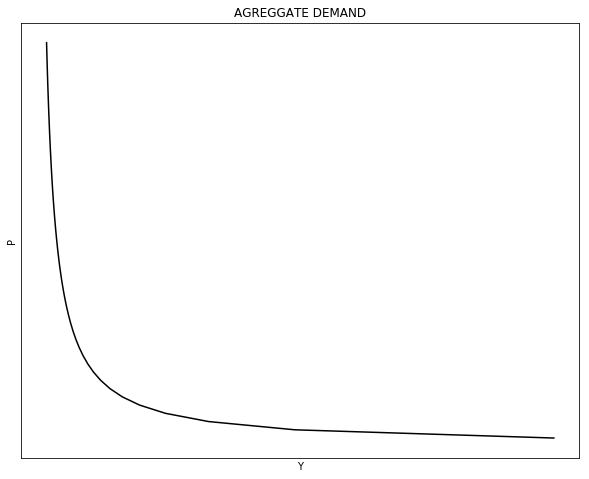

In [2]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|BUILD AD CLASS"
class class_AD:
    "Define the parameters of the model"
    def __init__(self, a     = 20   ,  # AD: autonomous consumption 
                       b     = 0.2  ,  # AD: marginal propensity to consume
                       alpha = 5    ,  # AD: autonomous imports
                       beta  = 0.1  ,  # AD: marginal propensity to import
                       T     = 1    ,  # AD: Taxes
                       I     = 10   ,  # AD: Investment
                       G     = 8    ,  # AD: Government spending
                       X     = 2    ,  # AD: Exports
                       d     = 5    ,  # AD: Investment slope
                       c1    = 175  ,  # AD: Precautionary money demand
                       c2    = 2    ,  # AD: Transactions money demand
                       c3    = 50   ,  # AD: Speculatio money demand
                       B     = 250  ,  # AD: Base money
                       lmbda = 0.05 ,  # AD: Currency drain ratio
                       rho   = 0.10 ): # AD: Reserve requirement)

        "Assign the parameter values"
        self.a     = a
        self.b     = b
        self.alpha = alpha
        self.beta  = beta
        self.T     = T
        self.I     = I
        self.G     = G
        self.X     = X
        self.d     = d
        self.c1    = c1
        self.c2    = c2
        self.c3    = c3
        self.B     = B
        self.lmbda = lmbda
        self.rho   = rho

    "Money multiplier"
    def m(self):
        #Unpack the parameters (simplify notation)
        lmbda = self.lmbda
        rho   = self.rho
        #Calculate m
        return ((1 + lmbda)/(rho + lmbda))
   
    "Money supply"     
    def M(self):
        #Unpack the parameters (simplify notation)
        B = self.B
        #Calculate M
        return (B*self.m())
    
    "AD: Aggregate demand"
    def AD(self, P):
        #Unpack the parameters (simplify notation)
        a     = self.a
        alpha = self.alpha
        b     = self.b
        beta  = self.beta
        T     = self.T
        I     = self.I
        G     = self.G
        X     = self.X
        d     = self.d
        c1    = self.c1
        c2    = self.c2
        c3    = self.c3
        #Calculate AD
        AD_level1 = (((a-alpha)-(b-beta)*T+I+G+X)/d-c1/c3)
        AD_level2 = ((1-b+beta)/d-c2/c3)**(-1)
        AD_shape  = self.M()/c3 * ((1-b+beta)/d - c2/c3)**(-1)
        return (AD_level1 * AD_level2 + AD_shape/P)

"3|SHOW RESULTS"
out = class_AD()

print("Money multiplier =", round(out.m(), 2))
print("Money supply ="    , round(out.M(), 2))

size = 50
P = np.arange(1, size)
Y = out.AD(P)

"4|PLOT AD"
y_max = np.max(P)
x_max = np.max(Y)
v = [0, x_max, 0, y_max]
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="AGREGGATE DEMAND", xlabel="Y", ylabel="P")
ax.plot(Y, P, "k-")
ax.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())  # Hide ticks
plt.show()

# 3. LONG-RUN AGGREGATE SUPPLY (LRAS)

Prices are flexible in the long-run, therefore money is neutral and the $LRAS$ is a vertical line (a given value of $Y$ rather than a function). The valor of $Y$ in the long-run can be derived from the Solow model's steady-state. From the [Solow model notes](https://nbviewer.jupyter.org/github/ncachanosky/Macroeconomics-with-Python/blob/master/Solow%20Model.ipynb) (section 2) we know that there is an equilibrium level of capital $K^*$. Therefore, assuming a typical Cobb-Douglass production function with constant returns to scale, for any period of time $t$, output in the long run $(Y_{LR})$ equals:

\begin{align}
    K_{LR} &= N \cdot \left(\frac{sA}{\delta} \right)^{\frac{1}{1-\theta}}  \\
    Y_{LR} &= A \cdot \left(K_{LR}^{\theta} N^{1-\theta} \right)
\end{align}

Where $A$ is techonology or total factor productivity (TFP), $N$ is labor, and $\theta$ is the output elasticity of capital. In the long-run, the leve of output will grow at the rate of growth of population $(n)$ and technology $(\gamma)$. This is shown as a right-ward movemet in the common pictorial depiction of the AD-AS model. Also note that since th $LRAS$ is a value (a vertical line), it can only shift **left** or **right**, but not up or down.

# 4. SHORT-RUN AGGREGATE SUPPLY (SRAS)

As long as wages are sticky, then changes in $P$ do have short-run effects on the level of $Y$ thourgh changes in the real wage $(W/P)$. In the long-run $N$ is at full employment and the representative firm can change the size of $K$. But in the short-run, the firm can change $N$ but $K$ is fixed. Therefore, to construct the $SRAS$ we need the bheavior of labor supply in the short-run. For simplicity, this note takes a simple approach. It assumes a closed economy (you can try to add a foreign sector yourself) and lets the level of employment be defined by the following function with respect to the price level (you cantry to  replace with a labor market as discussed in the [labor market notes](https://nbviewer.jupyter.org/github/ncachanosky/Macroeconomics-with-Python/blob/master/Labor%20Market.ipynb)):

\begin{equation}
 N = \eta \cdot P^{\nu}; \eta, \nu > 0
\end{equation}

The function is (implicitly) assuming constant expectations by labor. Therefore, an increase in the price level reduces the real wage paid by the firms, but labor does not realize that the real wage has decreased. 

# 5. PUTTING ALL THE PIECES TOGETHER

We can now put all the pieces together. In this case, instead of using a `class` the sample code uses `functions`. The model assumes a given stock of capital $K = \bar{K}$ (you can try to add a *steady-state* level of capital as discussed in the [Solow Model notes](https://nbviewer.jupyter.org/github/ncachanosky/Macroeconomics-with-Python/blob/master/Solow%20Model.ipynb). The code uses the `root` function to find the price level of equilibrium (section 4).

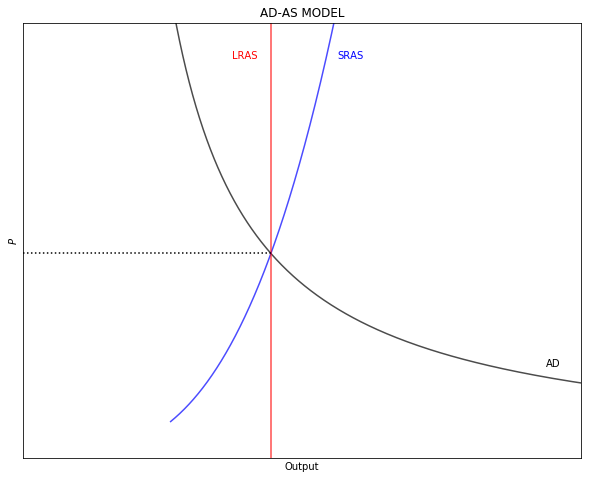

In [5]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library
from scipy.optimize import root  # Package to find the roots of a function

"2|DEFINE PARAMETERS"
# PRODUCTION FUNCTION
A      =   1     # Total Factor Productivity
varphi =   0.70  # Output elasticity of capital
# CAPITAL STOCK
s      =   0.25  # Savings rate
delta  =   0.20  # Depreciation rate
K      = 100     # Capital stock
# LABOR SUPPLY
v      =   0.75  # Labor supply "slope" with respect to P
# MONEY SUPPLY
B      = 100     # Base Money
lmbda  =   0.05  # Currency drain
rho    =   0.20  # Reserve ratio
# AGGREGATE DEMAND
a      =  40     # Autonomous household domestic consumption
b      =   0.3   # Marginal propensity to consume
T      =   1     # Taxes
I      =   4     # Investment with i = 0
G      =   2     # Government Spengin
d      =   2     # Slope of investment with respect to i
c1     = 200     # Money demand: Precuationary
c2     =   0.6   # Money demand: Transactions
c3     =  10     # Money demand: Speculation

"3|FUNCTIONS"
# LABOR SUPPLY
def N(P):
    N = v * P
    return N

# OUTPUT
def output(P):
    output = A * (K**(varphi)) * (N(P)**(1-varphi))
    return output

# MONEY SUPPLY
m = (1+lmbda)/(rho+lmbda)   # Money Multiplier
M = B*m                     # Money Supply

# AGGREGATE DEMAND
def AD(P):
    AD_level1 = (a-b*T + I + G)/d - (c1/c3)
    AD_level2 = ((1-b)/d - (c2/c3))**(-1)
    AD_shape  = M/c3 * AD_level2
    AD = AD_level1 * AD_level2 + AD_shape/P
    return AD

"4|EQUILIBRIUM: PRICE LEVEL"
def equation(P):
    Eq1 = AD(P) - output(N(P))
    equation = Eq1
    return equation

sol = root(equation, 10)
Pstar = sol.x
Nstar = N(Pstar)

# #Define domain of the model
size = np.round(Pstar, 0)*2
P_vector = np.linspace(1, size, 500)    # 500 dots between 1 and size

# Agregate Supply and Aggregate Demand
LRAS = output(N(Pstar))
SRAS = output(N(P_vector))
AD_vector = AD(P_vector)

"5|PLOT AD-AS MODEL"
v = [0, 80, 0, size]                            # Axis range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="AD-AS MODEL", ylabel=r'$P$', xlabel="Output")
ax.plot(AD_vector, P_vector, "k-", alpha = 0.7)
ax.plot(SRAS     , P_vector, "b-", alpha = 0.7)
plt.axvline(x = LRAS, color = 'r', alpha = 0.7)
plt.axhline(y = Pstar, xmax = LRAS/80, ls=':', color='k')
ax.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
plt.text(75,  2.5, "AD")
plt.text(45, 11.0, "SRAS", color='b')
plt.text(30, 11.0, "LRAS", color='r')
plt.axis(v)
plt.show()

# 6. SHOCKS

We now add a real and a nominal positive shocks. In the case of the real shock, technology increases by 10-percent. In the case of the nominal shock, base money increases by 10-percent. Even though the output is not shown, the code inclides the inflation rate and the percent change in output calculations for each one of the two shocks. Note that the $SRAS$ shifts horizontally with shocks to the $LRAS$. 

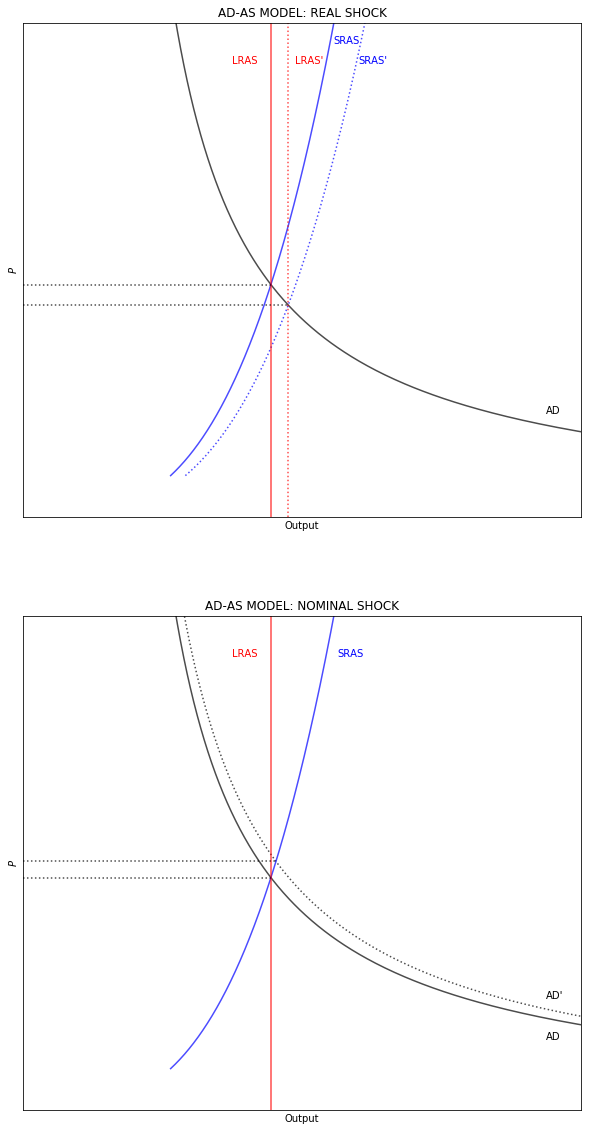

In [8]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library
from scipy.optimize import root  # Package to find the roots of a function

"2|DEFINE PARAMETERS"
# PRODUCTION FUNCTION
A      =   1     # Total Factor Productivity
varphi =   0.70  # Output elasticity of capital
# CAPITAL STOCK
s      =   0.25  # Savings rate
delta  =   0.20  # Depreciation rate
K      = 100     # Capital stock
# LABOR SUPPLY
v      =   0.75  # Labor supply "slope" with respect to P
# MONEY SUPPLY
B      = 100     # Base Money
lmbda  =   0.05  # Currency drain
rho    =   0.20  # Reserve ratio
# AGGREGATE DEMAND
a      =  40     # Autonomous household domestic consumption
b      =   0.3   # Marginal propensity to consume
T      =   1     # Taxes
I      =   4     # Investment with i = 0
G      =   2     # Government Spengin
d      =   2     # Slope of investment with respect to i
c1     = 200     # Money demand: Precuationary
c2     =   0.6   # Money demand: Transactions
c3     =  10     # Money demand: Speculation

"3|FUNCTIONS"
# LABOR SUPPLY
def N(P):
    N = v * P
    return N

# OUTPUT
def output(P):
    output = A * (K**(varphi)) * (N(P)**(1-varphi))
    return output

# MONEY SUPPLY
m = (1+lmbda)/(rho+lmbda)   # Money Multiplier
M = B*m                     # Money Supply

# AGGREGATE DEMAND
def AD(P):
    AD_level1 = (a-b*T + I + G)/d - (c1/c3)
    AD_level2 = ((1-b)/d - (c2/c3))**(-1)
    AD_shape  = M/c3 * AD_level2
    AD = AD_level1 * AD_level2 + AD_shape/P
    return AD

"4|EQUILIBRIUM: PRICE LEVEL"
def equation(P):
    Eq1 = AD(P) - output(N(P))
    equation = Eq1
    return equation

sol = root(equation, 10)
Pstar = sol.x
Nstar = N(Pstar)

# #Define domain of the model
size = np.round(Pstar, 0)*2
P_vector = np.linspace(1, size, 500)    # 500 dots between 1 and size

# Agregate Supply and Aggregate Demand
LRAS = output(N(Pstar))
SRAS = output(N(P_vector))
AD_vector = AD(P_vector)

"5|CALCULATE SHOCK EFFECTS"
real_shock    = 1.10
nominal_shock = 1.10

# Real shock
def output2(P):
    A2 = A * real_shock
    output2 = A2 * (K**(varphi)) * (N(P)**(1-varphi))
    return output2

def equation_real(P):
    Eq1 = AD(P) - output2(N(P))
    equation_real = Eq1
    return equation_real

sol_real = root(equation_real, 10)
Pstar2 = sol_real.x
Nstar2 = N(Pstar2)
LRAS2  = output2(N(Pstar2))
SRAS2  = output2(N(P_vector))

gP2 = Pstar2/Pstar - 1                          # Percent change in P
gY2 = LRAS2/LRAS - 1                            # Percent change in Y 

# Nominal shock
M3 = (B * nominal_shock) * m

def AD3(P):
    AD_level1 = (a-b*T + I + G)/d - (c1/c3)
    AD_level2 = ((1-b)/d - (c2/c3))**(-1)
    AD_shape  = M3/c3 * AD_level2
    AD3 = AD_level1 * AD_level2 + AD_shape/P
    return AD3

def equation_nominal(P):
    Eq1 = AD3(P) - output(N(P))
    equation_nominal = Eq1
    return equation_nominal

sol_nominal = root(equation_nominal, 10)
Pstar3 = sol_nominal.x
Nstar3 = N(Pstar3)
AD_vector3 = AD3(P_vector)

gP3 = Pstar3/Pstar - 1                          # Percent change in P
gY3 = output(Pstar3)/output(Pstar) - 1          # Percent change in Y 

"6|PLOT AD-AS MODEL WITH SHOCKS"
P3_stop = output(N(Pstar3))

v = [0, 80, 0, size]                            # Axis range
fig, ax = plt.subplots(nrows=2, figsize=(10, 20))
ax[0].set(title="AD-AS MODEL: REAL SHOCK", ylabel=r'$P$', xlabel="Output")
ax[0].plot(AD_vector  , P_vector, "k-", alpha = 0.7)
ax[0].plot(SRAS       , P_vector, "b-", alpha = 0.7)
ax[0].plot(SRAS2      , P_vector, "b:", alpha = 0.7)
ax[0].axvline(x = LRAS  , ls="-", color='r', alpha = 0.7)
ax[0].axvline(x = LRAS2 , ls=":", color="r", alpha = 0.7)
ax[0].axhline(y = Pstar , xmax = LRAS/80 , ls=":", color="k", alpha = 0.7)
ax[0].axhline(y = Pstar2, xmax = LRAS2/80, ls=":", color="k", alpha = 0.7)
ax[0].text(75.0,  2.5, "AD")
ax[0].text(44.5, 11.5, "SRAS" , color = "b")
ax[0].text(48.0, 11.0 , "SRAS'", color = "b")
ax[0].text(30.0, 11.0, "LRAS" , color = "r")
ax[0].text(39.0, 11.0, "LRAS'", color = "r")
ax[0].yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax[0].xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax[0].axis(v)
ax[1].set(title="AD-AS MODEL: NOMINAL SHOCK", ylabel=r'$P$', xlabel="Output")
ax[1].plot(AD_vector  , P_vector, "k-", alpha = 0.7)
ax[1].plot(AD_vector3 , P_vector, "k:", alpha = 0.7)
ax[1].plot(SRAS       , P_vector, "b-", alpha = 0.7)
ax[1].axvline(x = LRAS  , ls="-", color="r", alpha = 0.7)
ax[1].axhline(y = Pstar , xmax = LRAS/80, ls=":", color="k", alpha = 0.7)
ax[1].axhline(y = Pstar3, xmax = P3_stop/80, ls=":", color="k", alpha = 0.7)
ax[1].text(75,  1.7, "AD")
ax[1].text(75,  2.7, "AD'")
ax[1].text(45, 11.0, "SRAS" , color = "b")
ax[1].text(30, 11.0, "LRAS" , color = "r")
ax[1].yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax[1].xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax[1].axis(v)
plt.show()